In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -u "/content/drive/MyDrive/dataset/archive.zip" -d "/content/drive/MyDrive/dataset/new"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65242339.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65267116.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65275626.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_6529266.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65329617.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65338712.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65338797.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65387162.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65404494.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65426218.jpg  
  inflating: /content/drive/MyDrive/dataset/new/train/sad/Training_65430136.jpg  
  inflating: /content/drive/MyDrive/dataset/new/

In [4]:
train_dir = '/content/drive/MyDrive/dataset/new/train'
test_dir = '/content/drive/MyDrive/dataset/new/test'

In [29]:
# Image size

IMAGE_SIZE = (48,48)
IMAGE_SHAPE = IMAGE_SIZE + (3,)

classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

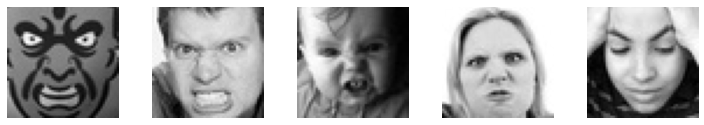

In [ ]:
plot_images(train_dir+'/angry')

In [ ]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


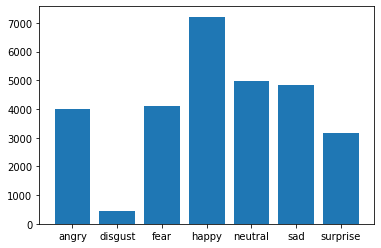

In [ ]:
plot_bar_chart_diagram(train_dir)

{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


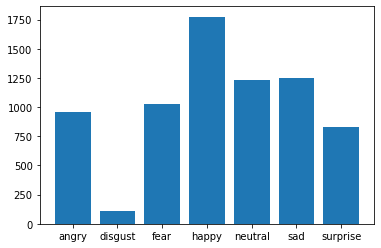

In [ ]:
plot_bar_chart_diagram(test_dir)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization,GlobalAveragePooling2D


import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [7]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,
                                   featurewise_std_normalization=False,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen  = ImageDataGenerator(rescale = 1./255)



In [8]:
# Load datasat

train_dataset  = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

test_dataset = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = IMAGE_SIZE,
                                                  class_mode = 'categorical',
                                                  shuffle =True,
                                                  batch_size = 6)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
# Data labels

class_labels = test_dataset.class_indices
class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# **Model Without Transfer Learning**

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
epochs = 40
history = model.fit(x = train_dataset,
                    workers = 8,
                    epochs = epochs,
                    validation_data = test_dataset,
                    callbacks=[es, mc])

Epoch 1/40
448/449 [============================>.] - ETA: 0s - loss: 8.8779 - accuracy: 0.2095
Epoch 1: val_accuracy improved from -inf to 0.24575, saving model to best_model.h5
449/449 [==============================] - 206s 458ms/step - loss: 8.8765 - accuracy: 0.2096 - val_loss: 8.2053 - val_accuracy: 0.2458
Epoch 2/40
448/449 [============================>.] - ETA: 0s - loss: 7.6660 - accuracy: 0.2426
Epoch 2: val_accuracy improved from 0.24575 to 0.30231, saving model to best_model.h5
449/449 [==============================] - 68s 150ms/step - loss: 7.6644 - accuracy: 0.2429 - val_loss: 6.8376 - val_accuracy: 0.3023
Epoch 3/40
449/449 [==============================] - ETA: 0s - loss: 6.4722 - accuracy: 0.2757
Epoch 3: val_accuracy improved from 0.30231 to 0.33491, saving model to best_model.h5
449/449 [==============================] - 70s 154ms/step - loss: 6.4722 - accuracy: 0.2757 - val_loss: 5.7338 - val_accuracy: 0.3349
Epoch 4/40
448/449 [============================>.] - 

# Model With Transfer Learning

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers

import keras.backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

from IPython.display import Image, HTML
from tensorflow.keras.utils import plot_model

In [11]:
# VGG16

base_model = tf.keras.applications.VGG16(input_shape= IMAGE_SHAPE,include_top=False,weights="imagenet")
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [12]:
for layer in base_model.layers[:11]:
    layer.trainable=False


In [14]:
# Build transfer learning Model

model=Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(GaussianNoise(0.01))
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 512)        2048      
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 1, 1, 512)        0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                        

In [15]:
# Compile model

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=METRICS)

In [16]:
from collections import Counter

In [17]:
# Run Model

counter = Counter(train_dataset.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_dataset,
                  validation_data=test_dataset,
                  epochs = 30,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)

Epoch 1/30
449/449 [==============================] - 99s 185ms/step - loss: 5.2748 - accuracy: 0.8159 - precision: 0.1906 - recall: 0.0889 - auc: 0.5470 - f1_score: 0.1211 - val_loss: 3.6821 - val_accuracy: 0.8251 - val_precision: 0.3292 - val_recall: 0.2164 - val_auc: 0.6324 - val_f1_score: 0.2551 - lr: 1.0000e-04
Epoch 2/30
449/449 [==============================] - 86s 191ms/step - loss: 4.5187 - accuracy: 0.8353 - precision: 0.3246 - recall: 0.1412 - auc: 0.6298 - f1_score: 0.1961 - val_loss: 4.0065 - val_accuracy: 0.7870 - val_precision: 0.2397 - val_recall: 0.2261 - val_auc: 0.5968 - val_f1_score: 0.2320 - lr: 1.0000e-04
Epoch 3/30
449/449 [==============================] - 82s 182ms/step - loss: 4.0892 - accuracy: 0.8438 - precision: 0.3944 - recall: 0.1745 - auc: 0.6798 - f1_score: 0.2414 - val_loss: 4.0589 - val_accuracy: 0.8071 - val_precision: 0.3200 - val_recall: 0.3111 - val_auc: 0.6830 - val_f1_score: 0.3147 - lr: 1.0000e-04
Epoch 4/30
449/449 [==========================

In [18]:
#check score

train_evalation = model.evaluate(train_dataset)
test_evaluation = model.evaluate(test_dataset)

1197/1197 [==============================] - 16s 14ms/step - loss: 1.2212 - accuracy: 0.9044 - precision: 0.7229 - recall: 0.5364 - auc: 0.9086 - f1_score: 0.6061


In [22]:
metric_list = ["Loss","Accuracy", "Precision", "Recall", "Auc", "F1_Score"]

df = pd.DataFrame(list(zip(metric_list, 
                           [round(num, 3) for num in train_evalation], 
                           [round(num, 3) for num in test_evaluation])),
                  columns=['Metric Name', 'Train', 'Validate'])

print('\n\nModel Scores\n')

HTML(df.to_html(escape=False))



Model Scores



,Metric Name,Train,Validate
0,Loss,0.981,1.221
1,Accuracy,0.921,0.904
2,Precision,0.798,0.723
3,Recall,0.598,0.536
4,Auc,0.943,0.909
5,F1_Score,0.683,0.606


In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


In [31]:
#save model

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


**predict**

(48, 48, 1)


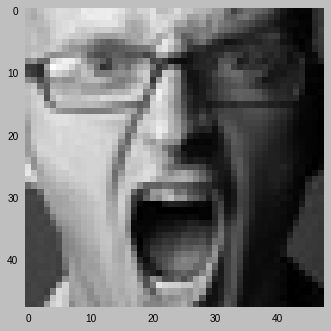

In [42]:
plt.style.use('grayscale')
plt.grid(visible=None)
img_path='/content/drive/MyDrive/dataset/new/test/angry/PrivateTest_13278552.jpg'
test_image=image.load_img(img_path,target_size= IMAGE_SIZE,color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
if test_image.shape[2] == 1:
    test_image = test_image[:, :, 0]
plt.imshow(test_image)
plt.show()

In [33]:
img=image.load_img(img_path,target_size=IMAGE_SIZE)
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 48, 48, 3)


In [34]:
result=model.predict(img)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

[1. 0. 0. 0. 0. 0. 0.]
The person facial emotion is: Angry
